In [1]:
#Copy the code and change the name for other artists
artist_name = "Travis Scott"

In [2]:
import pandas as pd
import codecs
import json
from pandas.io.json import json_normalize
import re

In [3]:
#Machine learning libraries for Text analysis
import nltk  # machine learning with text
from nltk import download as nltk_download
from nltk.corpus import stopwords, wordnet  # List of common words
from nltk.tokenize import word_tokenize  # Split text into significant forms
from nltk.stem import WordNetLemmatizer  # Reduce words to their root form
from nltk import pos_tag  # Tag words with parts of speech
from collections import defaultdict, Counter  # Dictionaries that have a backup value
from sklearn.feature_extraction.text import CountVectorizer  # Convert text to sparse matrices
from textblob import TextBlob  # Sentiment analysis
from gensim.models.ldamodel import LdaModel  # Topic extraction
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS  # ngrams
from gensim.models.phrases import Phraser  # ngrams
from gensim import corpora, models, similarities  # Vectorization
import pyLDAvis
from wordcloud import WordCloud  # Create wordclouds
import matplotlib.pylab as plt

# Run next 2 cells only if you want to pull data from Genius

In [ ]:
from lyricsgenius import Genius

genius = Genius('JOSfSO0Cn0Y3avlw_ItRLdmwFj3s-36fjS-POUolMGFiWkUiE_zHXfQZVsOOqbxA', timeout=20)
artist = genius.search_artist(artist_name, max_songs = 300) # use max_songs=10 parameter to limit to 10 songs

In [ ]:
artist_json = artist.save_lyrics()

# Start here to use the data from the file on disk

In [4]:
#load the file
name_string = artist_name.replace(' ', '')
lyricsFile = "Lyrics_"+str(name_string)+".json"
with open(lyricsFile) as json_data:
    data = json.load(json_data)

# convert to dataframe
df = pd.DataFrame(data['songs'])
artist_df = df[['full_title', 'title', 'artist', 'lyrics', 'featured_artists', 'release_date']]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   full_title        294 non-null    object
 1   title             294 non-null    object
 2   artist            294 non-null    object
 3   lyrics            294 non-null    object
 4   featured_artists  294 non-null    object
 5   release_date      134 non-null    object
dtypes: object(6)
memory usage: 13.9+ KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Lyric Analysis

## Cleaning the lyrics

In [6]:
# convert everything to lower case
artist_df.lyrics = artist_df.lyrics.str.lower()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [7]:
artist_df.lyrics[2]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"[intro]\nall the commas\nmurda on the beat so it's not nice\nooh, hmm\n\n[chorus]\nfor this life, i cannot change (change)\nhidden hills, deep off in the main (main)\nm&m's, sweet like candy cane (m&m's, cane, cane)\ndrop the top, pop it, let it bang (top, pop it, pop it)\nfor this life, i cannot change (change)\nhidden hills, deep off in the main (hills, main)\nm&m's, sweet like candy cane (m&m's, cane, cane)\ndrop the top, pop it, let it bang (top, pop it, pop it)\n\n[verse 1]\ndrop the top, play hide and seek (yeah)\njump inside, jump straight to the league (league)\ntake a sip, feel just how i be (it's lit)\non freeway, but no, ain't nothin' free (straight up)\nbend laws, bend lanes (skrrt, skrrt)\nbeen bustin' bills, but still, ain't nothin' change (skrrt, skrrt)\nyou in the mob soon as you rock the chain (mob)\nshe caught the waves, just thumbin' through my braids (alright)\nheatin' up, baby, i'm just heatin' up (it's lit)\nneed your love, not a need, it is a must (yeah)\nfeelin

In [8]:
# remove the embed, share, copy at the end of each lyric
artist_df.lyrics = artist_df.lyrics.replace(to_replace="embedshare url:copyembed:copy", value="", regex=True) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Remove quotes
artist_df.lyrics = artist_df.lyrics.replace(to_replace="(\u2019)", value="'", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# convert common contractions to the full word or phrase
artist_df.lyrics = artist_df.lyrics.replace(to_replace="wont", value="will not", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="wouldn't", value="wouldnt", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="can't", value="cannot", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="don't", value="dont", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="'re", value=" are", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="wanna", value="want to", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="ain't", value="aint", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="gotta", value="got to", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="'ll", value=" will", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="lil'", value="little", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="hol'", value="hold", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="y'all", value="you all", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# convert more common contractions to the full word or phrase
artist_df.lyrics = artist_df.lyrics.replace(to_replace="it's", value="it is", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="that's", value="that is", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="i've", value="i have", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="i'm", value="i am", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="n' ", value="ng ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="'n ", value="ing ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=" 'em ", value=" them ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace="&", value="and", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
artist_df.lyrics[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'[part i]\n\n[intro: drake]\nastro, yeah\nsun is down, freezing cold\nthat is how we already know, winter\'s here\nmy dawg would probably do it for a louis belt\nthat is just all he know, he dont know nothing else\ni tried to show \'em, yeah\ni tried to show \'em, yeah, yeah\nyeah, yeah, yeah\ngoing on you with the pick and roll\nyoung la flame, he in sicko mode\n\n[part ii]\n\n[verse 1: travis scott and the notorious b.i.g.]\n(woo) made this here with all the ice on in the booth\nat the gate outside, when they pull up, they get me loose\nyeah, jump out boys, that is nike boys, hopping out coupes\nthis shit way too big, when we pull up, give me the loot (gimme the loot!)\nwas off the remy, had a papoose\nhad to hit my old town to duck the news\ntwo-four hour lockdown, we made no moves\nnow it is 4 am and i am back up popping with the crew\ni just landed in, chase b mixes pop like jamba juice\ndifferent colored chains, think my jeweler really selling fruits\nand they chokin\', man, know

In [13]:
# Remove common interjections, or singing sounds
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"aah|aagh|ayy|ooh|oo|oh|ah|na", value="", regex=True) 
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"hmm|mmm|brr", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"yeah", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"woah", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"uh", value="", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"ye", value="", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# remove verse, chorus, bridge, intro , outro anotations 
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"\[[^]]*\]", value="", regex=True) 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# get rid of tabs, new line, return symbols and parentheses
artist_df.lyrics = artist_df.lyrics.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=" ", regex=True)
artist_df.lyrics = artist_df.lyrics.replace(to_replace=[r"\(|\)", ""], value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
artist_df.lyrics[10]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


" , , meh, meh , meh, meh, meh , , meh, meh , meh, meh, meh , , meh, meh , meh, meh, meh , , meh, meh , meh, meh, meh and then we...   sleep through day, then we play all through the late night sleep through day, then we play all through the late night  , , , ,   all through the late night  and then we  s'il vous plaît, dont you hate, all through the late night  ,   all through the late night  meh, meh,   all through the late night  ,   all through the late night  meh, meh, ,   all through the late night    all through the late night  meh, meh,   all through the late night  meh, meh,   all through the late night  meh, meh,   all through the late night  wo    blimp's soarin', how the hell did i get in this space? four in the mornin', how did i get in this place? , it dont matter, got smoke, drink, and i am running this space done contemplatin', i ama take it in and grve in this case n,n-dimethyltryptamine and lysergic acid diethylamide the vibes are effervescent, delicious, just how the

In [17]:
# remove any other symbols except letters, numbers and underscore
artist_df.lyrics = artist_df.lyrics.replace(to_replace=r"\W", value=" ", regex=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
artist_df.lyrics[2]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' all the commas murda on the beat so it is not nice      for this life  i cannot change  change  hidden hills  deep off in the main  main  mandm s  sweet like candy cane  mandm s  cane  cane  drop the top  pop it  let it bang  top  pop it  pop it  for this life  i cannot change  change  hidden hills  deep off in the main  hills  main  mandm s  sweet like candy cane  mandm s  cane  cane  drop the top  pop it  let it bang  top  pop it  pop it    drop the top  play hide and seek    jump inside  jump straight to the league  league  take a sip  feel just how i be  it is lit  on freeway  but no  aint nothing free  straight up  bend laws  bend lanes  skrrt  skrrt  been busting bills  but still  aint nothing change  skrrt  skrrt  you in the mob sn as you rock the chain  mob  she caught the waves  just thumbing through my braids  alright  heating up  baby  i am just heating up  it is lit  need your love  not a need  it is a must    feeling stuck  you know how to keep me up      icy love  icy l

In [19]:
artist_df_clean = artist_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# Tokenize
artist_df.lyrics = artist_df.lyrics.apply(word_tokenize)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [21]:
artist_df.lyrics[2]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['all',
 'the',
 'commas',
 'murda',
 'on',
 'the',
 'beat',
 'so',
 'it',
 'is',
 'not',
 'nice',
 'for',
 'this',
 'life',
 'i',
 'can',
 'not',
 'change',
 'change',
 'hidden',
 'hills',
 'deep',
 'off',
 'in',
 'the',
 'main',
 'main',
 'mandm',
 's',
 'sweet',
 'like',
 'candy',
 'cane',
 'mandm',
 's',
 'cane',
 'cane',
 'drop',
 'the',
 'top',
 'pop',
 'it',
 'let',
 'it',
 'bang',
 'top',
 'pop',
 'it',
 'pop',
 'it',
 'for',
 'this',
 'life',
 'i',
 'can',
 'not',
 'change',
 'change',
 'hidden',
 'hills',
 'deep',
 'off',
 'in',
 'the',
 'main',
 'hills',
 'main',
 'mandm',
 's',
 'sweet',
 'like',
 'candy',
 'cane',
 'mandm',
 's',
 'cane',
 'cane',
 'drop',
 'the',
 'top',
 'pop',
 'it',
 'let',
 'it',
 'bang',
 'top',
 'pop',
 'it',
 'pop',
 'it',
 'drop',
 'the',
 'top',
 'play',
 'hide',
 'and',
 'seek',
 'jump',
 'inside',
 'jump',
 'straight',
 'to',
 'the',
 'league',
 'league',
 'take',
 'a',
 'sip',
 'feel',
 'just',
 'how',
 'i',
 'be',
 'it',
 'is',
 'lit',
 'on',

## Analysis: common 2 and 3 word phrases found in the lyrics

In [22]:
# Divide the lyrics into "sentences" so that the phrases don't straddle songs.   Each song = one sentence
sentences = []
for l in artist_df.lyrics:
    sentences.append(l)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Number of sentences should equal the number of songs
len(sentences)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


294

In [24]:
# check our result on the first sentence
sentences[0]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['astro',
 'sun',
 'is',
 'down',
 'freezing',
 'cold',
 'that',
 'is',
 'how',
 'we',
 'already',
 'know',
 'winter',
 's',
 'here',
 'my',
 'dawg',
 'would',
 'probably',
 'do',
 'it',
 'for',
 'a',
 'louis',
 'belt',
 'that',
 'is',
 'just',
 'all',
 'he',
 'know',
 'he',
 'dont',
 'know',
 'nothing',
 'else',
 'i',
 'tried',
 'to',
 'show',
 'em',
 'i',
 'tried',
 'to',
 'show',
 'em',
 'going',
 'on',
 'you',
 'with',
 'the',
 'pick',
 'and',
 'roll',
 'young',
 'la',
 'flame',
 'he',
 'in',
 'sicko',
 'mode',
 'w',
 'made',
 'this',
 'here',
 'with',
 'all',
 'the',
 'ice',
 'on',
 'in',
 'the',
 'bth',
 'at',
 'the',
 'gate',
 'outside',
 'when',
 'they',
 'pull',
 'up',
 'they',
 'get',
 'me',
 'lse',
 'jump',
 'out',
 'boys',
 'that',
 'is',
 'nike',
 'boys',
 'hopping',
 'out',
 'coupes',
 'this',
 'shit',
 'way',
 't',
 'big',
 'when',
 'we',
 'pull',
 'up',
 'give',
 'me',
 'the',
 'lt',
 'gim',
 'me',
 'the',
 'lt',
 'was',
 'off',
 'the',
 'remy',
 'had',
 'a',
 'papse',


In [25]:
# Look for frequently used 2 word combinations
from itertools import groupby

# Build the bigram model
bigram = Phrases(sentences)


# Find bigrams in the songs
two_word_phrases = []
i=0
while i < len(sentences): 
    bigrams = bigram[sentences[i]]
    for s in bigrams:
        if len(re.findall('_', s)) > 0:
            two_word_phrases.append(s)
    i = i + 1
two_word_phrases_df = pd.DataFrame(two_word_phrases, columns = ['Phrases'])
test = two_word_phrases_df.groupby(by = "Phrases").size().reset_index(name='counts')
test.sort_values(by = 'counts', ascending = False).head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
59,can_not,321
454,straight_up,219
259,let_s,157
522,want_to,146
77,club_up,120


In [26]:
# Looking for 3 word combinations 

# Build the trigram models
trigram = Phrases(bigram[sentences])

tri = []

# Construct trigram list looking at all songs
i=0
while i < len(sentences): 
    songtrigram = trigram[bigram[sentences[i]]]
    for s in songtrigram:
        if len(re.findall('_', s)) > 1:
            tri.append(s)
    i = i + 1

tri_df = pd.DataFrame(tri, columns = ['Phrases'])
test_tri = tri_df.groupby(by = "Phrases").size().reset_index(name='counts')
test_tri.sort_values(by = 'counts', ascending = False).head(30)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
150,it_is_lit,108
235,only_trill_niggas,75
13,aint_playing_with,67
58,club_up_fuck,59
52,changed_my_life_straight,50
76,dont_want_to,47
166,let_s_get_drunk,46
113,get_those_gsebumps_every,41
303,this_side_this_side,41
122,had_to_get,37


In [27]:
fourgram = Phrases(trigram[sentences])
four = []

# Construct trigram list looking at all songs
i=0
while i < len(sentences): 
    songtrigram = fourgram[trigram[sentences[i]]]
    for s in songtrigram:
        if len(re.findall('_', s)) > 2:
            four.append(s)
    i = i + 1
    
four_df = pd.DataFrame(four, columns = ['Phrases'])
test_four = four_df.groupby(by = "Phrases").size().reset_index(name='counts')
test_four.sort_values(by = 'counts', ascending = False).head(20)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Phrases,counts
10,changed_my_life_straight,50
46,let_s_get_drunk,46
85,this_side_this_side,41
7,call_your_friends_let,36
76,smoke_some_drink_some,31
66,piss_on_your_grave,30
36,got_bands_no_no,28
71,s_get_drunk_call,27
79,that_pussy_changed_my,25
69,rara_in_rara_in,24


In [28]:
len(set(tri))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


374

In [55]:
from gensim.models.phrases import Phrases, Phraser

phrases = Phrases(sentences, min_count=5, threshold=10, connector_words=ENGLISH_CONNECTOR_WORDS)
phrases_df = pd.DataFrame(columns = ['phrase', 'score'])
phrase_col = []
score_col = []
wordcount_col = []
for phrase, score in phrases.find_phrases(sentences).items():
    phrase_col.append(phrase)
    score_col.append(score)
    wordcount_col.append(len(re.findall('_', phrase)) + 1)   
phrases_df['phrase'] = phrase_col
phrases_df['score'] = score_col
phrases_df['wordcount'] = wordcount_col
phrases_df[phrases_df['wordcount'] > 2].sort_values(by='score', ascending = False).head(50)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,phrase,score,wordcount
260,crdite_the_tan,1526.925926,3
520,lyrics_from_snippet,1145.194444,3
247,bangers_in_the_system,1124.372727,4
35,win_the_retreat,1045.612319,3
458,seconds_or_maybe,824.540000,3
235,boxes_of_checks,780.814394,3
320,shots_on_an_island,668.545946,4
264,standing_in_the_ocean,640.170807,4
46,function_to_bonr,588.957143,3
165,ends_in_a_motel,572.597222,4


In [30]:
from nltk import ngrams
tgs = nltk.ngrams(sentences[0],5)
fdist = nltk.FreqDist(tgs)
d = Counter()
ngrams_df = pd.DataFrame(columns = ['N-gram', 'Count'])
ngrams_col = []
Count_col = []
for k, v in fdist.items():
    d[k] = v
    ngrams_col.append(k)
    Count_col.append(v)
ngrams_df['N-gram'] = ngrams_col
ngrams_df['Count'] = Count_col
ngrams_df.sort_values(by='Count', ascending = False).head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,N-gram,Count
424,"(a, light, like, a, light)",8
423,"(like, a, light, like, a)",8
425,"(light, like, a, light, like)",6
201,"(dont, play, us, for, weak)",3
399,"(dance, now, i, hit, the)",2
394,"(to, bus, it, to, the)",2
400,"(now, i, hit, the, fbo)",2
398,"(the, dance, now, i, hit)",2
397,"(to, the, dance, now, i)",2
396,"(it, to, the, dance, now)",2


In [31]:
artist_df.lyrics

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [astro, sun, is, down, freezing, cold, that, i...
1      [7, 30, in, the, night, i, get, those, gsebump...
2      [all, the, commas, murda, on, the, beat, so, i...
3      [i, got, rm, in, my, fumes, she, fill, my, min...
4      [dont, you, open, up, that, window, dont, you,...
                             ...                        
289                                [fuckin, marshy, mom]
290                                       [freak, bitch]
291                                                  [a]
292                        [that, is, right, london, ee]
293                                                   []
Name: lyrics, Length: 294, dtype: object

In [32]:
stop_words = stopwords.words("english")
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [y for y in x if y not in stop_words])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
artist_df.lyrics

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      [astro, sun, freezing, cold, already, know, wi...
1      [7, 30, night, get, gsebumps, every, time, com...
2      [commas, murda, beat, nice, life, change, chan...
3      [got, rm, fumes, fill, mind, ideas, highest, r...
4      [dont, open, window, dont, let, antidote, popp...
                             ...                        
289                                [fuckin, marshy, mom]
290                                       [freak, bitch]
291                                                   []
292                                  [right, london, ee]
293                                                   []
Name: lyrics, Length: 294, dtype: object

In [34]:
lemma = WordNetLemmatizer()

# Dictionary to convert between part-of-speech tags and the ones the lemmatizer understands

tag_dict = defaultdict(lambda : wordnet.NOUN)
tag_dict['J'] = wordnet.ADJ
tag_dict['V'] = wordnet.VERB
tag_dict['R'] = wordnet.ADV

# function to lemmatize a sentence

def get_lemma(word):
    """Gets the POS tag for a word, and then returns the lemmatized form of the word"""
    tag = pos_tag([word])[0][1][0]
    tag = tag_dict[tag]
    
    return lemma.lemmatize(word, tag)

# Perform the lemmatization
#artist_df.lyrics = artist_df.lyrics.apply(lambda x: [get_lemma(word) for word in x])#
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [get_lemma(word) for word in x])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
remove_words = ['like', 'get', 'got', 'know', 'say', 'one', 'two', 'go', 'see', 'dont']
artist_df.lyrics = artist_df.lyrics.apply(lambda x: [y for y in x if y not in remove_words])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
artist_df.lyrics[10]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'meh',
 'sleep',
 'day',
 'play',
 'late',
 'night',
 'sleep',
 'day',
 'play',
 'late',
 'night',
 'late',
 'night',
 'il',
 'vous',
 'plaît',
 'hate',
 'late',
 'night',
 'late',
 'night',
 'meh',
 'meh',
 'late',
 'night',
 'late',
 'night',
 'meh',
 'meh',
 'late',
 'night',
 'late',
 'night',
 'meh',
 'meh',
 'late',
 'night',
 'meh',
 'meh',
 'late',
 'night',
 'meh',
 'meh',
 'late',
 'night',
 'wo',
 'blimp',
 'soarin',
 'hell',
 'space',
 'four',
 'mornin',
 'place',
 'matter',
 'smoke',
 'drink',
 'run',
 'space',
 'do',
 'contemplatin',
 'ama',
 'take',
 'grve',
 'case',
 'n',
 'n',
 'dimethyltryptamine',
 'lysergic',
 'acid',
 'diethylamide',
 'vibe',
 'effervescent',
 'delicious',
 'n',
 'n',
 'dimethyltryptamine',
 'lysergic',
 'acid',
 'diethylamide',
 'vibe',
 'effervescent',
 'delicious',
 'sleep',
 'bed',
 'sleep',
 '

In [37]:
# Create the list of words and their frequency (corpus)
from gensim import corpora
pyLDAvis.enable_notebook()
#dictionary = corpora.Dictionary(artist_df.lyrics )
dictionary = corpora.Dictionary(artist_df.lyrics)
corpus = [dictionary.doc2bow(text) for text in artist_df.lyrics ]

import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
import gensim
NUM_TOPICS = 3
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0, '0.014*"side" + 0.013*"let" + 0.012*"call" + 0.011*"time" + 0.010*"nigga" + 0.008*"bitch" + 0.008*"drunk" + 0.008*"whoa" + 0.007*"damn" + 0.007*"make"')
(1, '0.031*"nigga" + 0.016*"fuck" + 0.011*"bitch" + 0.011*"night" + 0.011*"aint" + 0.009*"want" + 0.007*"love" + 0.007*"club" + 0.007*"band" + 0.007*"high"')
(2, '0.013*"back" + 0.011*"nigga" + 0.011*"pop" + 0.010*"straight" + 0.009*"h" + 0.008*"life" + 0.007*"make" + 0.007*"never" + 0.007*"change" + 0.006*"come"')


In [39]:
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
dictionary

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
from gensim.test.utils import datapath
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases, Phraser

#sentences = Text8Corpus(datapath('testcorpus.txt'))
artist_df.lyrics1 = [wd for wd in artist_df.lyrics]

# Build the bigram models
bigram = gensim.models.phrases.Phrases(artist_df.lyrics1, min_count=3, threshold=10)

# Construct bigram
print(bigram[artist_df.lyrics[0]])

['astro', 'sun_freeze', 'cold_already', 'winter_dawg', 'would_probably', 'louis_belt', 'nothing_else', 'try_show', 'em', 'try_show', 'em_pick', 'roll', 'young_la', 'flame_sicko', 'mode_w', 'make', 'ice_bth', 'gate_outside', 'pull_lse', 'jump_boy', 'nike_boy', 'hop_coupe', 'shit', 'way_big', 'pull', 'give_lt', 'gim_lt', 'remy_papse', 'hit_old', 'town_duck', 'news_four', 'hour_lockdown', 'make', 'move_4', 'back', 'pop', 'crew_land', 'chase_b', 'mix', 'pop_jamba', 'juice_different', 'color_chain', 'think_jeweler', 'really_sell', 'fruit_chokin', 'man_cracker', 'wish_nse', 'someone_win', 'retreat_deep', 'play', 'play', 'play', 'keep', 'play_u', 'weak_someone', 'win_retreat', 'deep', 'play', 'play', 'play', 'keep', 'play_u', 'weak', 'shit', 'way_formal', 'follow_suit', 'stacey_dash', 'girl', 'aint_clue', 'hoe', 'make_record', 'produce_might', 'take_ex', 'put_group', 'hit_es', 'need_btch', 'bout_turn', 'function_bonr', 'told_hop', 'come_305', 'bitch', 'treat_uncle', 'luke_stop', 'pop', 'pussy

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-41-00f6d1d42edf>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  artist_df.lyrics1 = [wd for wd in artist_df.lyrics]


# Wordcloud

In [42]:
artist_df.lyrics = artist_df.lyrics.apply(lambda x: " ".join(x))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [43]:
artist_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_title,title,artist,lyrics,featured_artists,release_date
0,SICKO MODE by Travis Scott (Ft. Drake),SICKO MODE,Travis Scott,astro sun freeze cold already winter dawg woul...,"[{'api_path': '/artists/130', 'header_image_ur...",2018-08-03
1,​goosebumps by Travis Scott (Ft. Kendrick Lamar),​goosebumps,Travis Scott,7 30 night gsebumps every time come around eas...,"[{'api_path': '/artists/1421', 'header_image_u...",2016-09-02
2,BUTTERFLY EFFECT by Travis Scott,BUTTERFLY EFFECT,Travis Scott,comma murda beat nice life change change hidde...,[],2017-05-15
3,HIGHEST IN THE ROOM by Travis Scott,HIGHEST IN THE ROOM,Travis Scott,rm fume fill mind idea high rm lit hope make o...,[],2019-10-04
4,Antidote by Travis Scott,Antidote,Travis Scott,open window let antidote pop pill hill hollywd...,[],2015-06-23


In [44]:
# Create an object that converts strings into a sparse matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features= 20000 , min_df=0.01, ngram_range= (1,1))

# Convert the text column to a sparse matrix

data_dtm = vectorizer.fit_transform(artist_df.lyrics)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [45]:
# Create a dataframe of terms and frequencies
# Get the frequency of each term

term_frequencies = data_dtm.sum(axis=0)

# Match frequencies to terms

frequent_terms = [(word, term_frequencies[0, id]) for word, id in vectorizer.vocabulary_.items()]

# Convert the word-frequency pairings to a dataframe

term_df = pd.DataFrame(columns=["term","frequency"], data=frequent_terms)

# Sort the dataframe

term_df.sort_values(by="frequency", ascending=False, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
term_df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,term,frequency
132,nigga,1005
131,fuck,506
106,bitch,480
86,aint,435
271,want,415


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


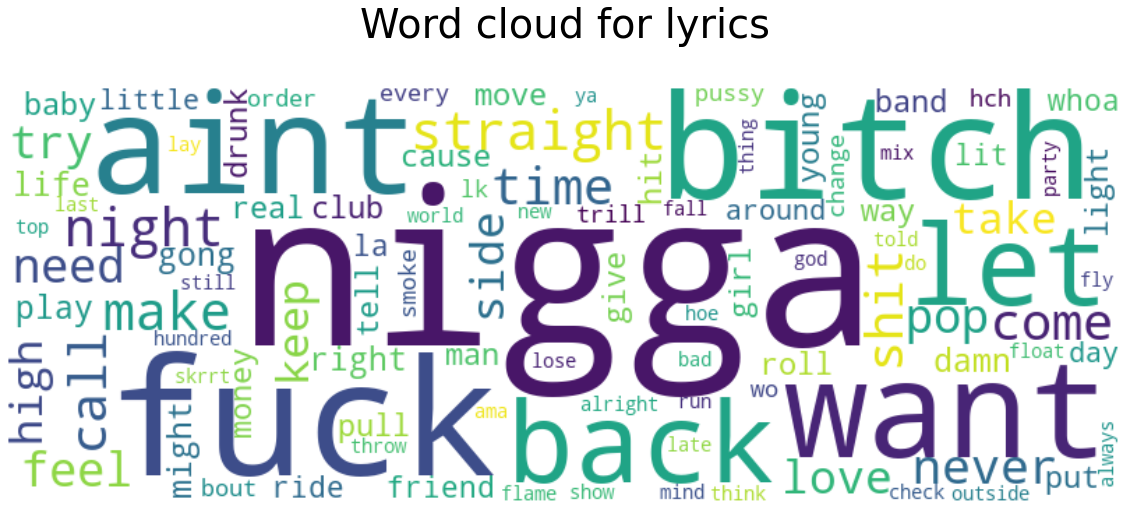

In [46]:
# Create a dictionary of most frequent terms ((required for word clouds)

term_dict = term_df.set_index('term')['frequency'].to_dict()

# Create a wordcloud of most frequent terms

wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud

plt.figure(figsize=(20, 10))
plt.title("Word cloud for lyrics", fontsize = 40, pad = 50 )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [47]:
term_df_no_n = term_df.iloc[1: , :]

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


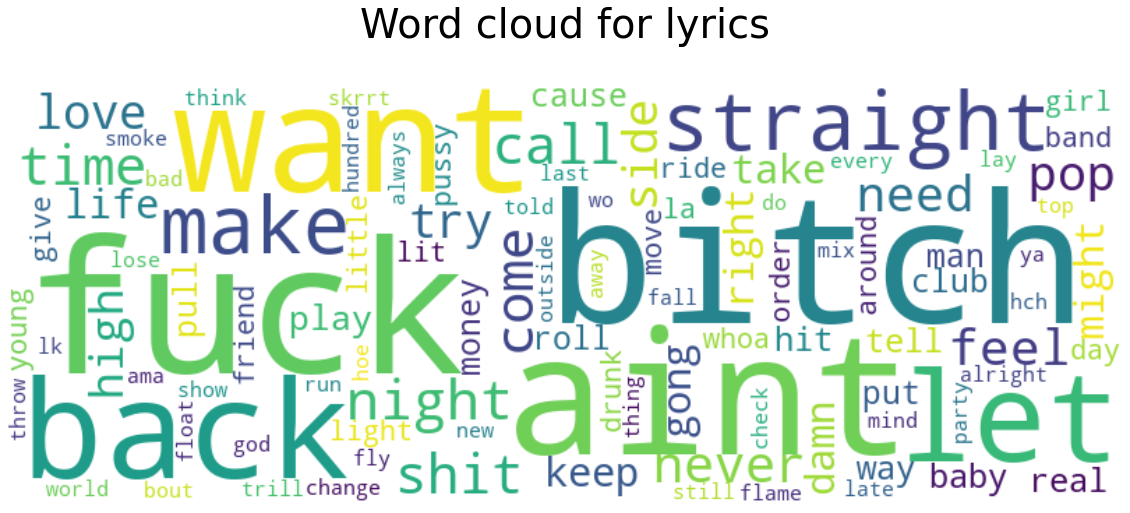

In [48]:
# Create a dictionary of most frequent terms ((required for word clouds)

term_dict = term_df_no_n.set_index('term')['frequency'].to_dict()

# Create a wordcloud of most frequent terms

wc = WordCloud(width=800, height=300, background_color="white",
               max_words=100)

wc.generate_from_frequencies(term_dict)

# Display the cloud

plt.figure(figsize=(20, 10))
plt.title("Word cloud for lyrics", fontsize = 40, pad = 50 )
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# Sentiment

In [49]:
# Assign sentiment to each lyric
artist_df["sentiment"] = artist_df.lyrics.apply(lambda x: TextBlob(x).sentiment.polarity)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-d312c35c4e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df["sentiment"] = artist_df.lyrics.apply(lambda x: TextBlob(x).sentiment.polarity)


In [50]:
artist_df.sort_values(by="sentiment", ascending=False).head(10)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,full_title,title,artist,lyrics,featured_artists,release_date,sentiment
164,Perfect by Travis Scott,Perfect,Travis Scott,call want call want perfect perfect perfect ca...,[],None,0.690000
199,L.O.V.E. Interlude by Travis Scott,L.O.V.E. Interlude,Travis Scott,kind love gold take away kind kind love gold n...,[],None,0.566667
155,LOST FOREVER by Travis Scott (Ft. James Blake ...,LOST FOREVER,Travis Scott,ever lose ever lose ever lose ever lose foreve...,"[{'api_path': '/artists/13298', 'header_image_...",None,0.494949
90,Love It Mane by Travis Scott,Love It Mane,Travis Scott,bueno high ever lk cloud god hard god 2 whippi...,[],None,0.473682
76,Flying High by Travis Scott (Ft. Toro y Moi),Flying High,Travis Scott,fly high shawty fly high fly high shawty fly h...,"[{'api_path': '/artists/14082', 'header_image_...",2015-09-04,0.427976
202,Pressure* by Travis Scott,Pressure*,Travis Scott,lyric snippet jack deal kind pressure roll god...,[],None,0.425000
233,Lights Out* by Travis Scott,Lights Out*,Travis Scott,light tidal wave,[],None,0.400000
277,Super Jack by Travis Scott,Super Jack,Travis Scott,super jack bitch line bitch kiss dick yo nigga...,[],None,0.375000
211,I'm Fine (Demo) by Travis Scott,I’m Fine (Demo),Travis Scott,fine fine fine fine fine fine fine fine fine w...,[],None,0.368519
105,My Ex Best Friend by Travis Scott (Ft. James F...,My Ex Best Friend,Travis Scott,baby love baby baby love baby love baby baby l...,"[{'api_path': '/artists/17649', 'header_image_...",None,0.353947


In [51]:
artist_df['Datetime'] = pd.to_datetime(df['release_date'], format="%Y/%m/%d")
artist_df = artist_df.sort_values(by = "Datetime")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-51-20a3b369a7a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  artist_df['Datetime'] = pd.to_datetime(df['release_date'], format="%Y/%m/%d")


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


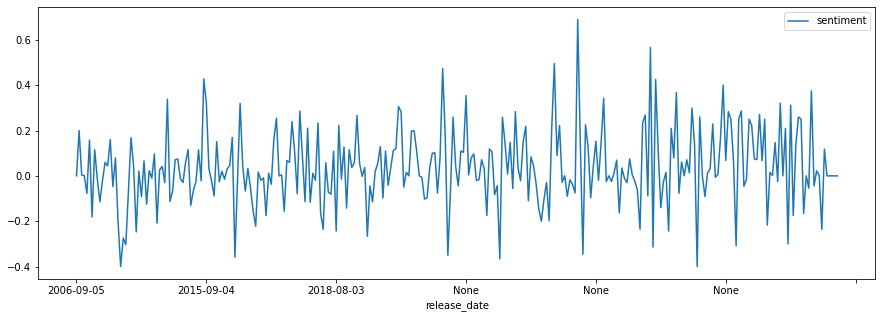

In [52]:
plt = artist_df.plot(x = 'release_date', y = 'sentiment', figsize=(15, 5))

In [53]:
artist_df.describe()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,sentiment
count,294.000000
mean,0.036523
std,0.166305
min,-0.400000
25%,-0.045677
50%,0.015422
75%,0.118571
max,0.690000
